In [214]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [215]:
from tqdm import tqdm

In [216]:
import pandas as pd
studies_csv = pd.read_csv('../raw_data/Updated_Artist_studies_master_1_Jun_2022.csv')
studies_df = studies_csv.copy()
studies_df.shape

(3408, 11)

In [217]:
studies_df.fillna("", inplace = True)

In [218]:
studies_df.shape

(3408, 11)

In [219]:
studies_df.columns = ['l_name', 'f_name',
       'style_represented', 'complete', 'user', 'sgl_img_folder',
       'cards_folder', 'batch_id', 'non_visual',
       'style_or_effect', 'notes']

In [220]:
# filter out styles and non visual artists
artist_df = studies_df[studies_df['complete'].str.contains('x') &
                       ~studies_df['non_visual'].str.contains('x') &
                       ~studies_df['style_or_effect'].str.contains('x')]


In [221]:
artists_interest_df = artist_df[artist_df['batch_id'] == 1.0]
len(artists_interest_df)

142

In [222]:
artists_interest_df.loc[:, 'key'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1).str.replace(' ', '_')

artists_interest_df.loc[:, 'prompt'] = artists_interest_df.apply(lambda row: f"{row['f_name']} {row['l_name']}", axis = 1)

/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [223]:
import clip
import numpy as np
model, preprocess = clip.load("ViT-B/32", device='cpu', jit=False)

In [333]:
artist_embed_list = []
for artist in tqdm(artists_interest_df.prompt):

    text_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, {artist}, Trending on artstation').to('cpu')
    #print(text_input.shape)
    text_embs = model.encode_text(text_input).float()
    text_embs = text_embs / text_embs.norm(dim=-1, keepdim=True)
    #print(text_embs.shape)
    artist_embed_list.append(text_embs.detach().numpy())

embed_df = pd.DataFrame(np.squeeze(artist_embed_list))

100%|█████████████████████████████████████████| 142/142 [00:21<00:00,  6.56it/s]


In [334]:
embed_df

0         1         2         3         4         5         6    \
0    0.060856 -0.048610  0.085098  0.110647 -0.015314 -0.049621  0.002925   
1    0.085399 -0.117761 -0.003910  0.005902 -0.027171 -0.068051 -0.006034   
2    0.081050 -0.040338 -0.038463  0.003430  0.033889 -0.075861 -0.003295   
3    0.034689 -0.047638 -0.023051  0.008796 -0.012548 -0.003488  0.010828   
4    0.068654 -0.060289 -0.044910  0.042554  0.020124  0.008479 -0.025543   
..        ...       ...       ...       ...       ...       ...       ...   
137  0.068772 -0.047363 -0.025256  0.020914 -0.018167 -0.058979  0.001063   
138  0.072066 -0.037768 -0.022894  0.037549 -0.011522 -0.041016  0.008528   
139  0.073159 -0.051875 -0.028199  0.014220 -0.009945 -0.030573  0.012406   
140  0.090281 -0.061412 -0.021963  0.003676  0.027651 -0.018559  0.007355   
141  0.073974 -0.050723 -0.038476  0.011603 -0.015162 -0.038436  0.004780   

          7         8         9    ...       502       503       504  \
0    0.066412  0.027089  0.046987  ...  0.027022  0.016134  0.111544   
1    0.066743  0.011427  0.024530  ... -0.006515 -0.022902  0.112482   
2    0.043582  0.036815  0.003394  ... -0.042796 -0.001224  0.186604   
3    0.042280 -0.064730 -0.003553  ... -0.029368 -0.036709  0.143131   
4    0.015049  0.015849  0.041042  ... -0.026253 -0.039739  0.114589   
..        ...       ...       ...  ...       ...       ...       ...   
137  0.050730 -0.006029 -0.017066  ... -0.016757 -0.015575  0.099230   
138  0.013830  0.012232 -0.007411  ... -0.025967 -0.033550  0.103679   
139  0.070107 -0.007929 -0.005166  ... -0.014632 -0.012845  0.108811   
140  0.076338 -0.002605  0.007804  ... -0.001165  0.018343  0.127853   
141  0.087024 -0.026495 -0.004418  ... -0.006902 -0.018797  0.102110   

          505       506       507       508       509       510       511  
0    0.051242  0.017555  0.015606  0.053384 -0.029480  0.010939 -0.075493  
1   -0.002940 -0.025733  0.004111  0.027327 -0.059148  0.023553 -0.002351  
2    0.018778 -0.025085 -0.011721  0.041364 -0.074420 -0.000363 -0.029698  
3   -0.017976 -0.008308 -0.004495  0.033111 -0.055005 -0.006516 -0.012002  
4   -0.068940 -0.017004 -0.012452  0.065570 -0.044869  0.015808 -0.041101  
..        ...       ...       ...       ...       ...       ...       ...  
137  0.013258 -0.011088  0.019466  0.043590 -0.087116 -0.030094 -0.007899  
138 -0.004083 -0.011908  0.022762  0.056168 -0.099071 -0.024696 -0.006218  
139  0.001806 -0.010166  0.039878  0.057524 -0.114113 -0.012082 -0.003838  
140  0.033881 -0.004859  0.023573  0.065950 -0.120064  0.010075 -0.010002  
141  0.011754 -0.011103  0.023994  0.071298 -0.124703 -0.025844 -0.016062  

[142 rows x 512 columns]

In [335]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(embed_df)

In [336]:
sim_matrix.shape

(142, 142)

In [337]:
np.argsort(sim_matrix)[:, -2]

array([ 81,  15, 108, 114,  67, 134, 121,  73,   4,  73,  73, 106,  13,
        12,  67,  24,  74,  35, 107,  35,  88,  53,  76, 134,  68,  30,
        30,  35,  56,  46, 122,  27, 131, 110,  65, 101,  80,  67,  76,
       139, 140, 119,  49, 138,  92, 139,  74, 134,  27,  65,  52,  89,
        23,  67,   4,  80, 128, 140, 117, 121,  79, 126, 140, 135,  98,
       140,  28,  53,  59,  43,  79,  76,  71, 117,  75,  74,  58,  32,
        88,  38,  55,  76,  67,  73, 107,  73,  56,  24, 106,  77, 117,
        89, 141,  65,  73,  47,  11, 113, 106,  30,  33, 122, 138,  76,
        73,  49, 113,  84, 106, 136, 139,  84, 123,  58, 124, 116, 115,
       121, 134, 129, 110, 117, 131, 114, 114, 131, 139,  33, 114, 119,
       120, 122, 138,  73, 124, 117, 114,  58, 132, 110, 139, 120])

In [338]:
np.unravel_index(np.argmax(sim_matrix), shape = (142, 142))

(33, 33)

In [339]:
sim_matrix[33, 33]

1.0000005

In [646]:
# base prompt
control_input = clip.tokenize(f'A beautiful painting of a building in a serene landscape, Trending on artstation').to('cpu')
control_embs = model.encode_text(text_input).float()
control_embs = control_embs / control_embs.norm(dim=-1, keepdim=True)
control_embs = control_embs.detach().numpy()


In [647]:
from sklearn.metrics.pairwise import euclidean_distances

def distance_calc(embeddings, control_embeddings, method = 'cosine'):
    if method == 'cosine':
        control_dist = cosine_similarity(embeddings, control_embeddings)
    elif method == 'both':
        control_dist = (euclidean_distances(embeddings, control_embeddings) + cosine_similarity(embeddings, control_embeddings)) / 2
    else:
        control_dist = euclidean_distances(embeddings, control_embeddings)
    return control_dist

In [675]:
artists_interest_df['control_dist'] = distance_calc(embed_df, control_embs, method = 'cosine')

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/506300744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['control_dist'] = distance_calc(embed_df, control_embs, method = 'cosine')


In [676]:
most_influence_idx = np.argsort(artists_interest_df['control_dist'].values)[:16]
least_influence_idx = np.argsort(artists_interest_df['control_dist'].values)[-16:]

In [677]:
least_influence_idx

array([121, 138, 134, 109, 113, 118, 136, 128, 124, 114,  33, 139, 110,
       130, 120, 141])

In [678]:
from artist_studies.loader import ArtLoader 

In [651]:
art_loader = ArtLoader()

# load data

exclude = ['styles single images', 'non-visual artist single images', '1. styles', '2. not recognized']

art_loader.get_image_folders(data_path = '../raw_data/batch 1',
                             #data_path = 'drive/My Drive/datasets/artist_studies/batch 1',
                             exclude_list = exclude,
                             num_artists = None, 
                             preprocessor = None)

  0%|                                                   | 0/142 [00:00<?, ?it/s]/Users/alecsharp/me/artist_studies/artist_studies/loader.py:31: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(pond_img_list)
/Users/alecsharp/me/artist_studies/artist_studies/loader.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(pond_img_list)
100%|███

In [652]:
# artists have a varying number of works
np.unique(art_loader.artist_list, return_counts=True)

(array(['Aivazovsky_Ivan', 'Al_Gazzar_Abdel_Hadi', 'Al_Halyan_Moosa',
        'Amano_Yoshitaka', 'Anderson_Wes', 'Andrews_Esao',
        'Arcimboldo_Giuseppe', 'Audubon_JohnJames', 'Bacon_Francis',
        'Baizley_John', 'Bak_Karol', 'Banksy', 'Barra_Didier',
        'Basquiat_Jean-Michel', 'Beeple', 'Beksinski_Zdzislaw',
        'Beksinski_Zdzislaw-sp', 'Berkey_John', 'Bierstadt_Albert',
        'Bilibin_Ivan', 'Bogen_Alexander', 'Bosch_Hieronymous',
        'Bosschart_Jofra', 'Botticelli_Sandro', 'Bradley_Noah',
        'Britenbucher_Renie', 'Brom_Gerald', 'Burns_Jim', 'Caravaggio',
        'Chebokha_Artem', 'Cole_Thomas', 'Constable_John',
        'Copley_William', 'Corot_Camille', 'Crane_Walter', 'Dali_Salvador',
        'Darrow_Geof', 'De_Nome_Francois', 'Delacroix_Eugene',
        'Delvaux_Paul', 'Delville_Jean', 'Desiderio_Monsu',
        'DiFate_Vincent', 'Dottori_Gerardo', 'Duchamp_Marcel',
        'Dulac_Edmund', 'Dulac_Germaine', 'Dulbecco_Gian_Paolo',
        'Durán_Victo

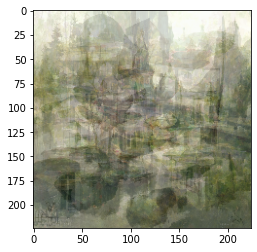

In [653]:
# average of all an artists works
import matplotlib.pyplot as plt
plt.imshow(np.mean(art_loader.array_art_list[:6] / 255, axis = 0))

In [679]:
from unidecode import unidecode
import math

def matching_formatter(string):
    return "".join(sorted(unidecode(string).replace('_', '')))

def sort_strings_in_array(string_array):
    return np.array([matching_formatter(x) for x in string_array])

def get_example_art(artist_key, num_art = 1):
    
    found_idx = np.argwhere(sort_strings_in_array(art_loader.artist_list) == matching_formatter(artist_key)).reshape(-1)
    
    num_art = min([num_art, len(found_idx)])
    
    if len(found_idx) < 1:
        return np.ones((224, 224, 3))
    
    # choose a random image
    idx = list(np.random.choice(found_idx, size = num_art, replace=False))
    
    if num_art == 1:
        return np.squeeze(art_examples[idx])
    
    side_length = math.ceil(np.sqrt(num_art))
    num_padding = (side_length ** 2) - num_art 
    
    art_examples_list = list(art_loader.array_art_list[idx])
    for pad in range(num_padding):
        art_examples_list.append(np.ones((224, 224, 3)))
        
    display_images = np.array(art_examples_list)
    
    stack_list = []
    for i in range(side_length):
        start_idx = (i * side_length)
        image_row = np.hstack(display_images[start_idx: start_idx + side_length])
        stack_list.append(image_row)
        
    return np.vstack(stack_list) / 255

In [680]:
artists_interest_df.head()

l_name     f_name style_represented complete         user  \
9     af Klint      Hilma               Yes        x   proximasan   
13  Aivazovsky       Ivan               Yes        x  KyrickYoung   
17       Amano  Yoshitaka               Yes        x    EErratica   
20    Anderson        Wes               Yes        x    EErratica   
21     Andrews       Esao               Yes        x   sureailabs   

   sgl_img_folder cards_folder batch_id non_visual style_or_effect notes  \
9               x            x      1.0          -               -         
13              x            x      1.0          -               -         
17              x            x      1.0          -               -         
20              x            x      1.0          -               -         
21              x            x      1.0          -               -         

                key           prompt             path      dist  control_dist  
9    Hilma_af_Klint   Hilma af Klint   Hilma_af_Klint  0.426733      0.426733  
13  Ivan_Aivazovsky  Ivan Aivazovsky  Ivan_Aivazovsky  0.719048      0.719048  
17  Yoshitaka_Amano  Yoshitaka Amano  Yoshitaka_Amano  0.744067      0.744067  
20     Wes_Anderson     Wes Anderson     Wes_Anderson  0.794738      0.794738  
21     Esao_Andrews     Esao Andrews     Esao_Andrews  0.655489      0.655489

In [681]:
# Key
artists_interest_df.key[artists_interest_df.key.str.contains("Falter")]

238    John_Philip_Falter
Name: key, dtype: object

In [682]:
# Folder names
pd.Series(np.unique([name for name in art_loader.artist_list if "Falter" in name]))

0    Falter_JohnPhilip
dtype: object

In [683]:
get_example_art(unidecode('Juan_Giménez'), num_art = 4) / 255

array([[[3.79422377e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79438046e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79594974e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92070599e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

       [[3.77413724e-03, 3.92156886e-03, 3.92156886e-03],
        [3.76848783e-03, 3.92156886e-03, 3.92156886e-03],
        [3.77209694e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

       [[3.78316035e-03, 3.92156886e-03, 3.92156886e-03],
        [3.79846082e-03, 3.92156886e-03, 3.92156886e-03],
        [3.82600119e-03, 3.92156886e-03, 3.92156886e-03],
        ...,
        [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
        [3.92156886e-03, 3.92

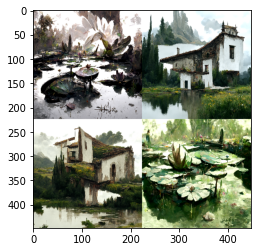

In [684]:
plt.imshow(get_example_art(unidecode('Juan_Giménez'), num_art = 4))

In [685]:
artists_interest_df['path'] = artists_interest_df['key'].copy()

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/3284048176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_interest_df['path'] = artists_interest_df['key'].copy()


In [686]:
# manually changing some Keys to match folder names
artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
.str.replace("Vincent_Di_Fate", "DiFate_Vincent")\
.str.replace('Zdzisław_Beksiński', 'Beksinski_Zdzislaw-sp')\
.str.replace('Syd_Mead', 'Mead_Syn')\
.str.replace('Johfra_Bosschart', 'Bosschart_Jofra')\
.str.replace('.', '')\
.str.replace('Raffeaello_Ossola', 'Ossola_Raffaello')\
.str.replace('H._R._(Hans_Ruedi)_Giger', 'Giger_HR')
#.str.replace('Agnes_Lawrence_Pelton', 'Pelton_AgnesLawrence')\
#.str.replace("John_Philip_Falter", "Falter_JohnPhilip")
                

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/3652431643.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/3652431643.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  artists_interest_df['path']  = artists_interest_df['path'].str.strip("_")\
/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_24603/3652431643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists_intere

In [687]:
most_influence_artists = artists_interest_df.iloc[most_influence_idx][['path', 'key']]
least_influence_artists = artists_interest_df.iloc[least_influence_idx][['path','key']]

In [688]:
list(np.argsort(control_dist.reshape(-1)))

[0,
 51,
 111,
 12,
 78,
 36,
 42,
 48,
 31,
 91,
 13,
 37,
 61,
 54,
 107,
 49,
 18,
 14,
 50,
 57,
 8,
 80,
 105,
 69,
 96,
 55,
 89,
 99,
 70,
 4,
 75,
 102,
 87,
 25,
 62,
 66,
 52,
 26,
 34,
 44,
 85,
 15,
 29,
 27,
 16,
 97,
 24,
 95,
 40,
 21,
 64,
 84,
 11,
 46,
 81,
 1,
 72,
 82,
 83,
 71,
 10,
 6,
 60,
 9,
 93,
 77,
 104,
 2,
 74,
 20,
 5,
 63,
 28,
 17,
 7,
 86,
 100,
 19,
 39,
 133,
 45,
 92,
 47,
 3,
 43,
 79,
 56,
 35,
 65,
 88,
 23,
 30,
 68,
 32,
 41,
 101,
 67,
 90,
 98,
 53,
 125,
 94,
 22,
 38,
 126,
 127,
 108,
 73,
 59,
 116,
 112,
 140,
 115,
 103,
 135,
 76,
 106,
 132,
 137,
 58,
 119,
 129,
 117,
 131,
 123,
 122,
 121,
 138,
 134,
 109,
 113,
 118,
 136,
 128,
 124,
 114,
 33,
 139,
 110,
 130,
 120,
 141]

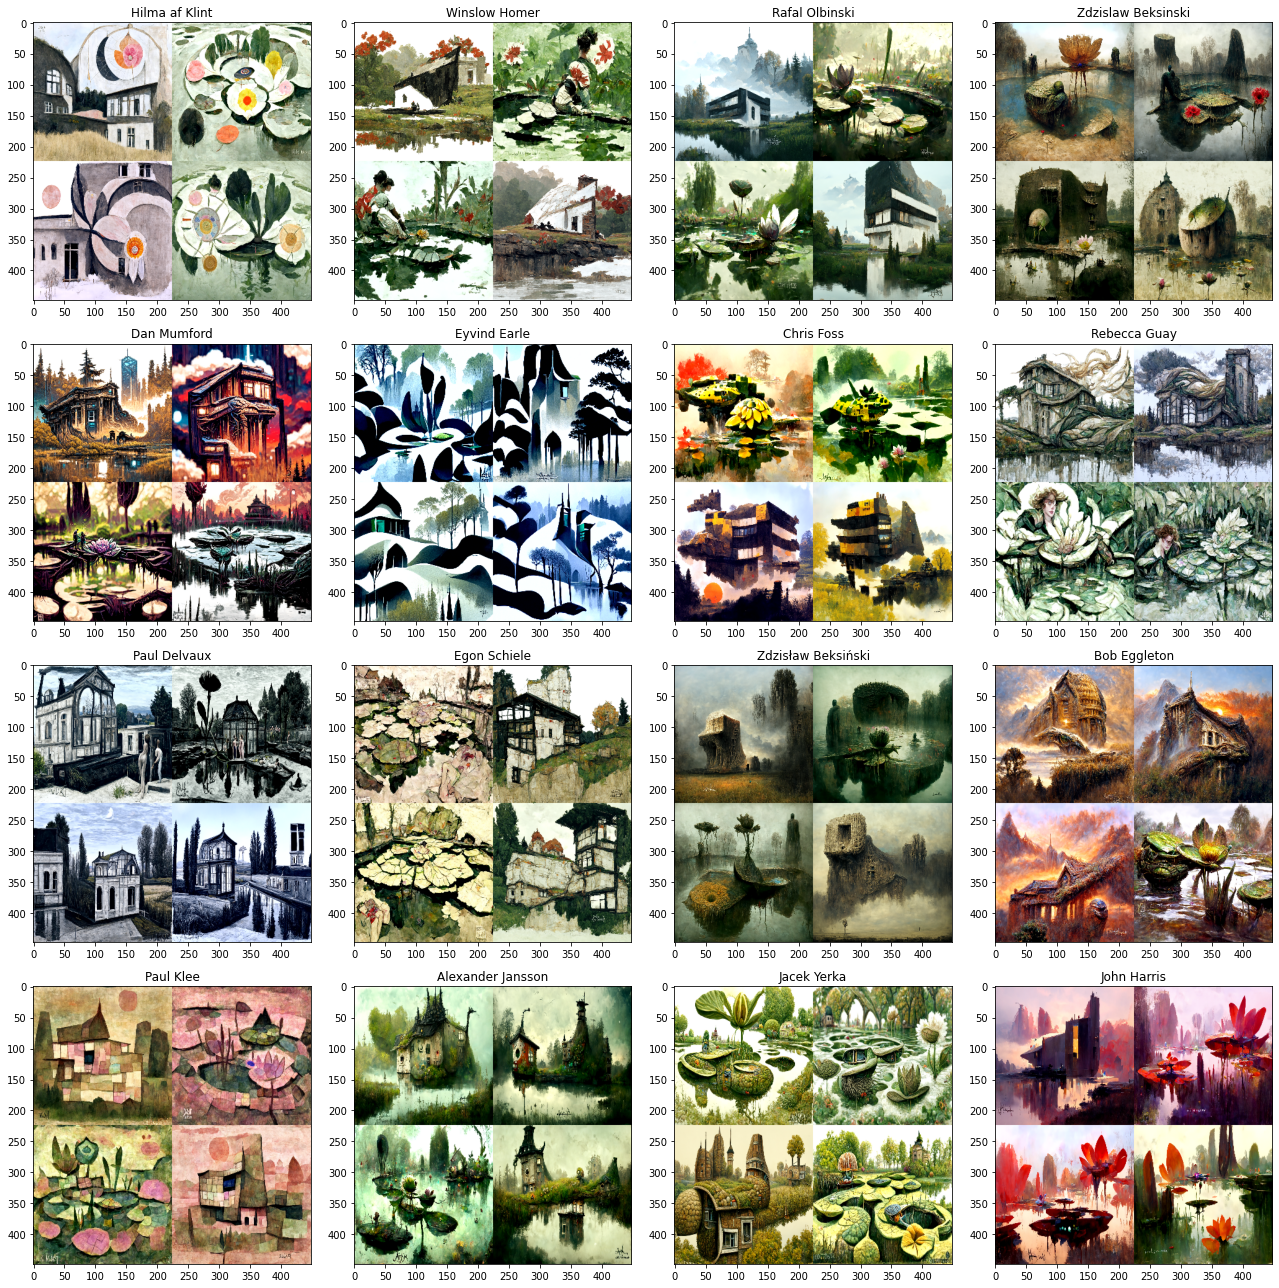

In [693]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, most_influence_artists.key, most_influence_artists.path):
    ax.imshow(get_example_art(artist_path, num_art = 4))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

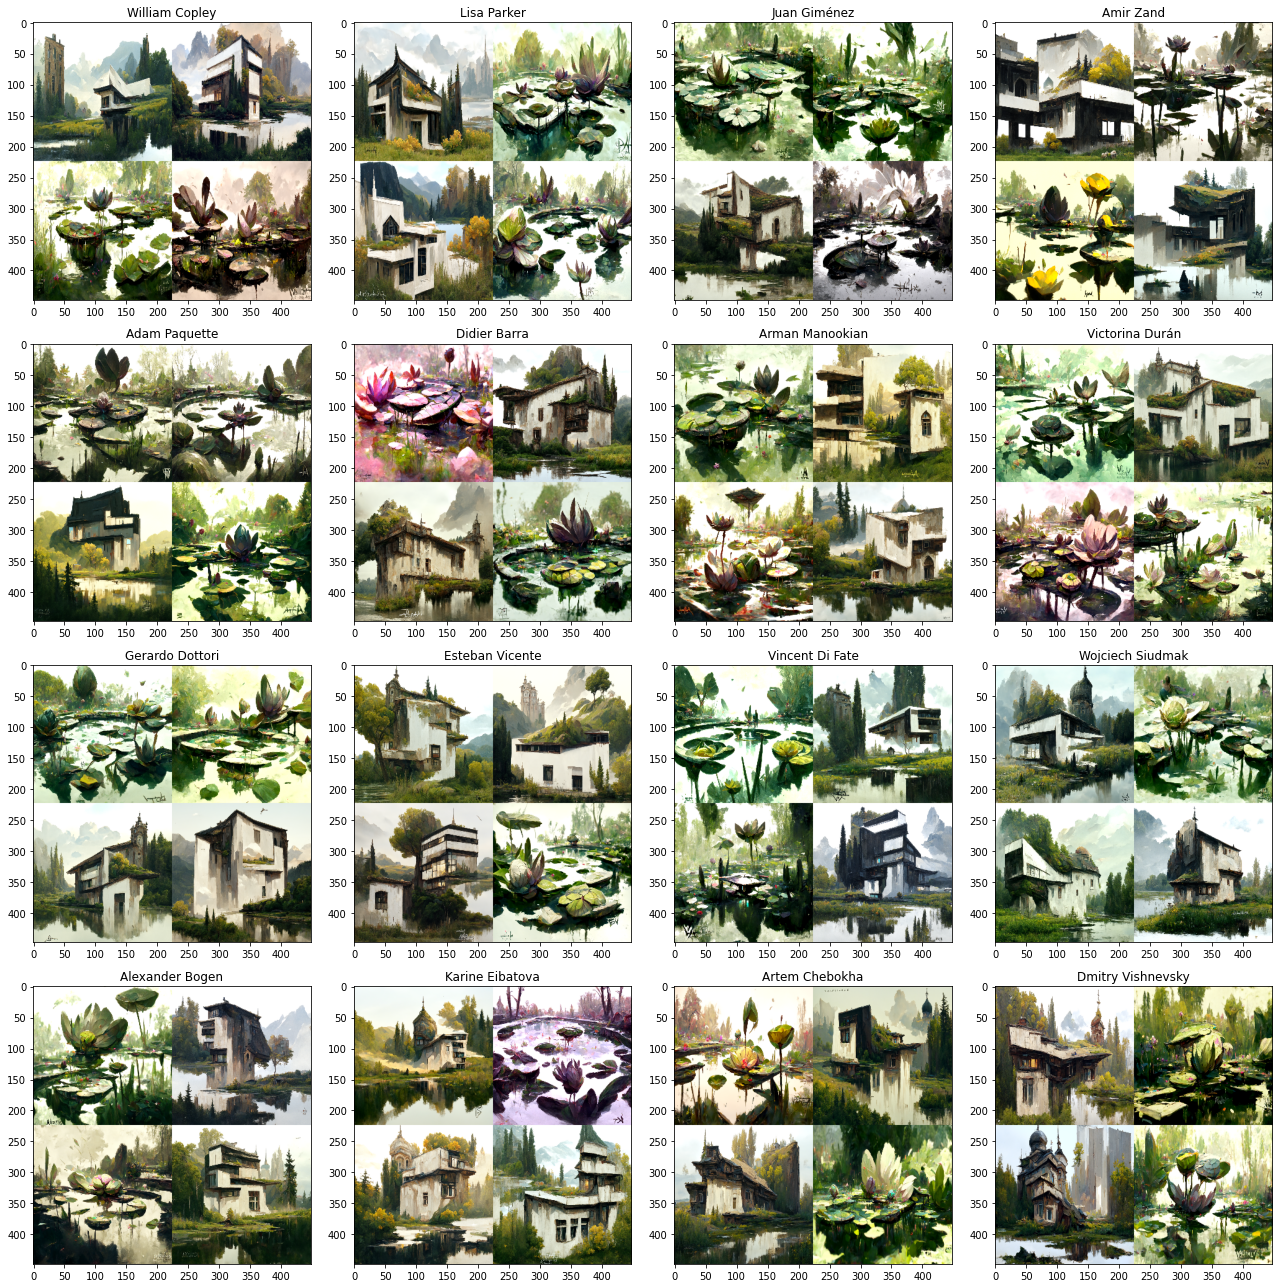

In [690]:
fig, axes = plt.subplots(4, 4, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, least_influence_artists.key, least_influence_artists.path):
    ax.imshow(get_example_art(artist_path, num_art = 4))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

In [691]:
artists_sorted_df = artists_interest_df.iloc[list(np.argsort(control_euc_dist.reshape(-1))), :]

In [ ]:
fig, axes = plt.subplots(12, 12, figsize = (18, 18))

for ax, artist_key, artist_path in zip(axes.flat, artists_sorted_df.key, artists_sorted_df.path):
    ax.imshow(get_example_art(artist_path, kind = 'array'))
    ax.set_title(f'{artist_key.replace("_", " ")}')
plt.tight_layout()

In [91]:
show_xy_images(x_coords = , y_coords = , img_list = example_art)

SyntaxError: invalid syntax (4038386603.py, line 1)